In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
# import seaborn as sns; sns.set()
from astropy.coordinates import SkyCoord
import astropy.units as u

# sns.set_style("ticks")

### Setting plot parameters

In [2]:
fontsize = 35
labelsize = 35


rc("xtick", labelsize=fontsize)
rc("ytick", labelsize=fontsize)
rcParams["axes.linewidth"] = 5.3
rcParams["xtick.major.width"] = 5.3
rcParams["xtick.minor.width"] = 5.3
rcParams["ytick.major.width"] = 5.3
rcParams["ytick.minor.width"] = 5.3
rcParams["xtick.major.size"] = 12.5
rcParams["xtick.minor.size"] = 6.5
rcParams["ytick.major.size"] = 12.5
rcParams["ytick.minor.size"] = 6.5

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50,
        }


cmap = plt.get_cmap('gnuplot2')
color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors = [cmap(value) for value in color_values]

### Loading data

In [5]:
photoz_table = pd.read_csv("tables_photometric/Hydra_iDR4_morecolumns.csv", usecols=['RA_1', 'DEC_1', 'zml', 'r_petro', 
                                                                           'odds', 'PROB_GAL'])

specz_table = pd.read_csv("tables_photometric/Hydra_iDR4_morecolumns_SpecZ_Catalogue_20230401-crossmatch.csv", usecols=['RA_1', 'DEC_1', 'z', 
                                                                                                        'PROB_GAL', 'r_petro', 'odds'])

table_ls = pd.read_csv("../CHANCES-target-selection/CHANCES-catalogues/Hydra-Catalogue_2023-11-23.csv", usecols=["RA_J2000", "Dec_J2000", "RMAG", "zml"])

In [6]:
ra_pz = photoz_table["RA_1"]
dec_pz = photoz_table["DEC_1"]
zml = photoz_table["zml"]
rpetro_pz = photoz_table["r_petro"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]

ra_sz = specz_table["RA_1"]
dec_sz = specz_table["DEC_1"]
z = specz_table["z"]
probgal_sz = specz_table["PROB_GAL"]
rpetro_sz = specz_table["r_petro"]
odds_sz = specz_table["odds"]

ra_ls = table_ls["RA_J2000"]
dec_ls = table_ls["Dec_J2000"]
rmag = table_ls["RMAG"]
zml_ls = table_ls["zml"]

### Define cuts and physical parameters

In [7]:
mlim = 21
odds_min = 0.7
z_range = 0.018
probgal_cut = 0.8

In [8]:
#Defining the center of Hydra (in degress)
ra0 = 159.17
dec0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra0)**2 + (dec - dec0)**2)

#Defining a mask for the objects inside 1R200
distances_pz = dist(ra_pz, dec_pz)
distances_sz = dist(ra_sz, dec_sz)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for ax, mlim in zip(axs.ravel(), [16, 17, 18, 19, 20, 21]):
    mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim)
    mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim)
    
    zml[mask_pz].hist(ax=ax, alpha=0.6, label='Photo-z', bins=50, histtype='stepfilled')
    z[mask_sz].hist(ax=ax, alpha=0.6, label='Spec-z', bins=50, histtype='stepfilled')
    
    ax.set_title("r_petro < {:.1f}".format(mlim), fontsize=25)
    ax.set_xlabel("Redshift", fontsize=25)
    ax.set_ylabel("Number of objects", fontsize=25)
    
    ax.yaxis.set_tick_params(labelsize=20, width=3)
    ax.xaxis.set_tick_params(labelsize=20, width=3)
    
    ax.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
    ax.axvline(x=0.025, linestyle='--', color='navy', linewidth=3.0)

fig.tight_layout()
plt.savefig("Plot-speczs-photozs.pdf", format='pdf')

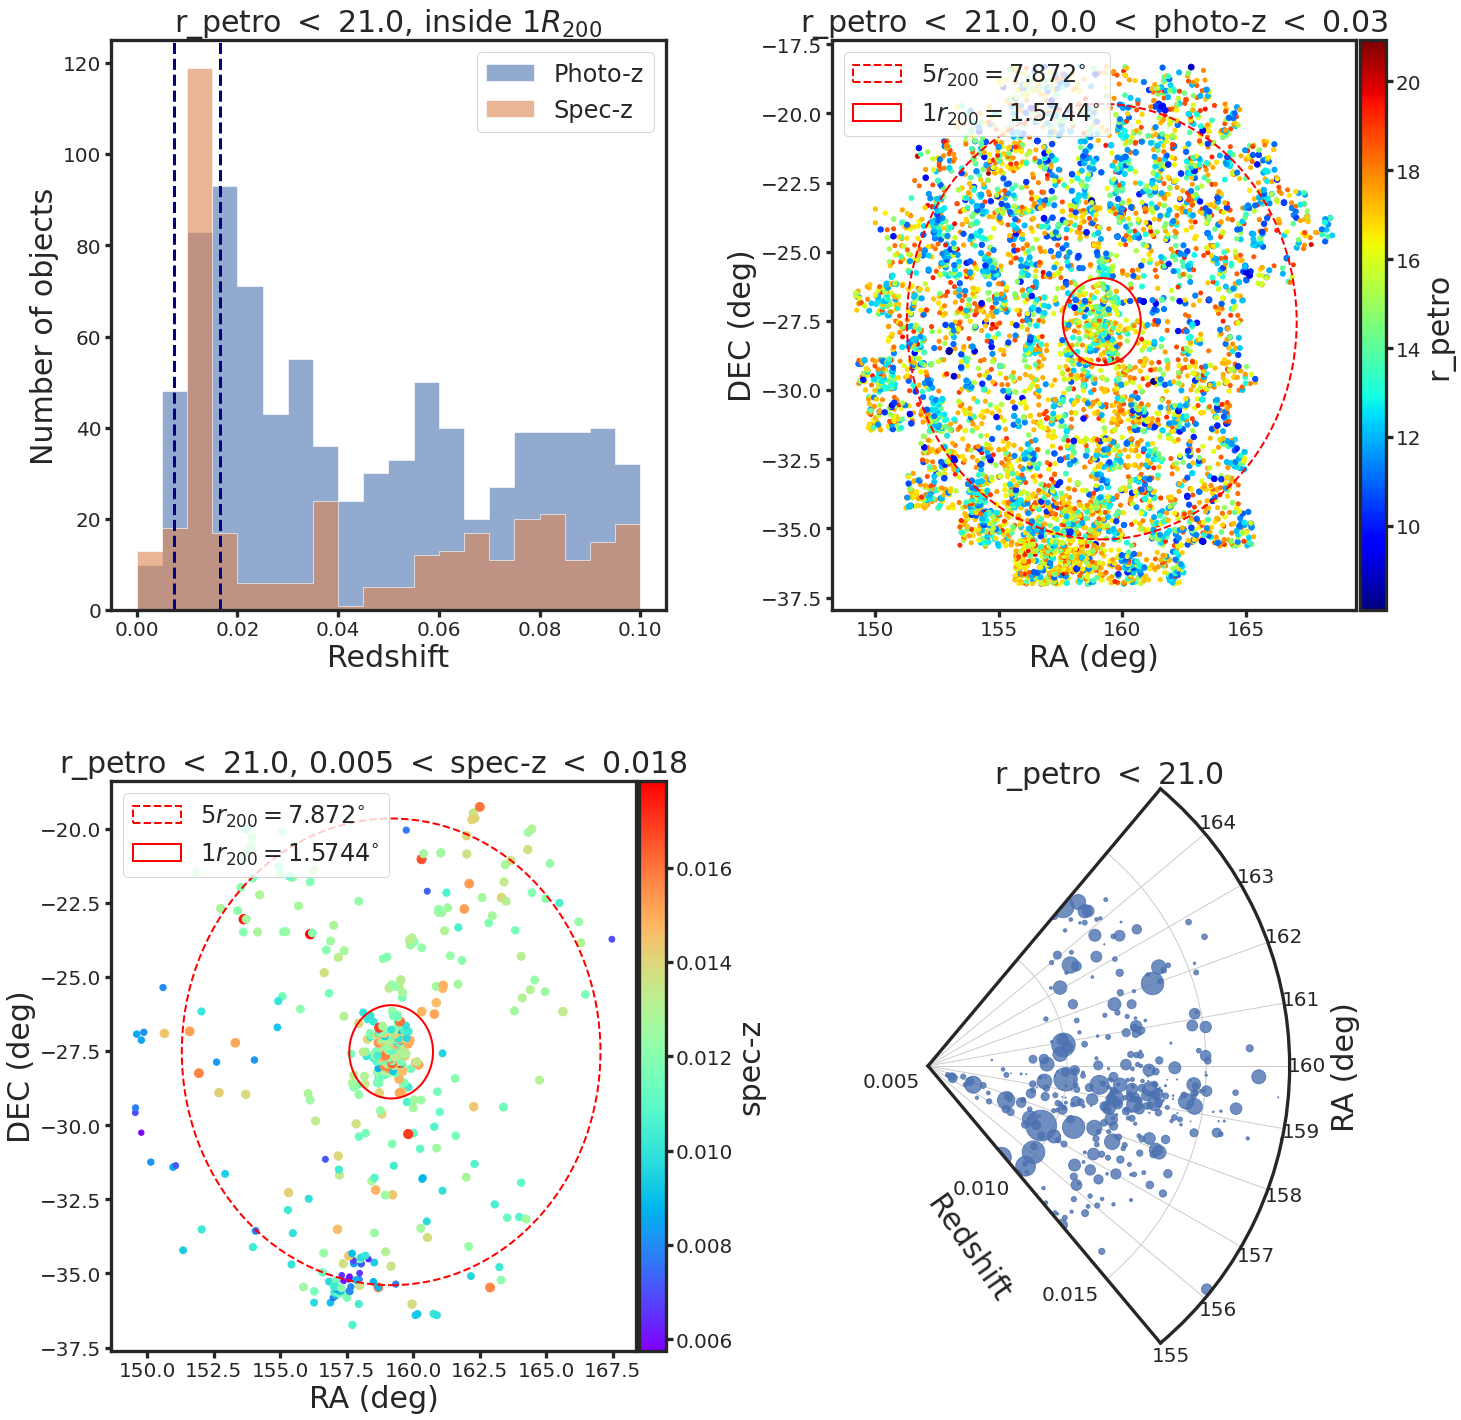

In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224, projection='polar')


#======================================
#First figure: histogram of redshifts
#======================================

#Pra cada plot eu defino essas "masks", que são os critérios pra selecionar os dados que quero plotar
mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim) & (odds > odds_min) & (prob_gal > probgal_cut)
mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim) & (probgal_sz > probgal_cut)


ax1.hist(zml[mask_pz], alpha=0.6, label='Photo-z', bins=20, range=(0, 0.1), histtype='stepfilled')
ax1.hist(z[mask_sz], alpha=0.6, label='Spec-z', bins=20, range=(0, 0.1), histtype='stepfilled')
ax1.set_title(r'r_petro $ < $ {:.1f},'.format(mlim) + r' inside 1$R_{200}$', fontsize=fontsize)
ax1.set_xlabel("Redshift", fontsize=fontsize)
ax1.set_ylabel("Number of objects", fontsize=fontsize)
ax1.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
ax1.axvline(x=0.0165, linestyle='--', color='navy', linewidth=3.0)
ax1.legend(fontsize=fontsize*0.8)


#======================================
#Second figure: RA x DEC distribution
#======================================

mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min) & (prob_gal > probgal_cut)

sc1 = ax2.scatter(x=ra_pz[mask], y=dec_pz[mask], c=rpetro_pz[mask], cmap=cm1, s=(1/rpetro_pz[mask])*300)
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)
ax2.set_title(r"r_petro $<$ {:.1f}, 0.0 $<$ photo-z $<$ 0.03".format(mlim), fontsize=fontsize)

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_petro", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra0, dec0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax2.add_patch(FiveR200)

OneR200 = plt.Circle((ra0, dec0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax2.add_patch(OneR200)

ax2.legend(fontsize=fontsize*0.8)

#======================================
#Third figure: RA x DEC distribution
#======================================

mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > probgal_cut)

sc1 = ax3.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax3.set_ylabel("DEC (deg)", fontsize=fontsize)
ax3.set_xlabel("RA (deg)", fontsize=fontsize)
ax3.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax3)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra0, dec0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax3.add_patch(FiveR200)

OneR200 = plt.Circle((ra0, dec0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax3.add_patch(OneR200)

ax3.legend(fontsize=fontsize*0.8)


#======================================
#Fourth figure: cone diagram in R.A.
#======================================

# Scale factor
sf = 10

mask_sz2 = (rpetro_sz < mlim) & (probgal_sz > probgal_cut)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax4.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax4.set_ylim(0.005, z_range)
ax4.set_yticks(np.arange(0.0050, z_range, 0.005))
ax4.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180)
ax4.set_xticklabels(np.arange(155,  165, 1))
ax4.set_theta_offset(sf*200*np.pi/180) # This offset is here to change the position of the slice
ax4.set_thetamax(sf*165)
ax4.set_thetamin(sf*155)

ax4.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax4.get_rlabel_position()
ax4.text(np.radians(label_position+60), ax4.get_rmax()*0.65,'Redshift', 
             rotation=-55, ha='center',va='center', fontsize=fontsize)
ax4.text(160*np.pi/180, z_range+0.002, 'RA (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax4.grid(True)

#======================================
#Global stuff
#======================================

# for ax in [ax1, ax2, ax3, ax4]:
#     ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
#     ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
    
plt.subplots_adjust(top=0.98, left=0.095, bottom=0.07, right=0.98, hspace=0.3, wspace=0.3)

# fig.tight_layout()
# plt.savefig("../Figures/z_raxdec_cone_mlim{:.1f}-v3.pdf".format(mlim), format='pdf')    

In [80]:
#Position of brightest ""galaxies"" on the ax1 plot
mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min)# & (prob_gal > 0.9)

i = np.isin(rpetro_pz, np.sort(np.array(rpetro_pz[mask]))[:10])

photoz_table[["RA", "DEC", "r_petro", "PROB_GAL", "PROB_STAR"]][i].sort_values(by="r_petro")

RA        DEC   r_petro  PROB_GAL  PROB_STAR
147462  158.504124 -23.743016  5.401323      0.77       0.22
184154  161.889016 -31.601225  6.489481      0.77       0.22
187919  161.266401 -29.684732  7.131208      0.77       0.22
105722  154.658625 -32.538048  7.257348      0.77       0.22
68494   156.108248 -25.564828  7.458511      0.77       0.22
43267   157.390155 -32.942840  7.573067      0.77       0.22
138395  160.906760 -30.868513  7.604758      0.77       0.22
225246  163.118863 -33.654558  7.628982      0.77       0.23
64255   159.969351 -33.609716  7.689562      0.77       0.22
183971  162.324251 -31.504399  7.805068      0.72       0.27

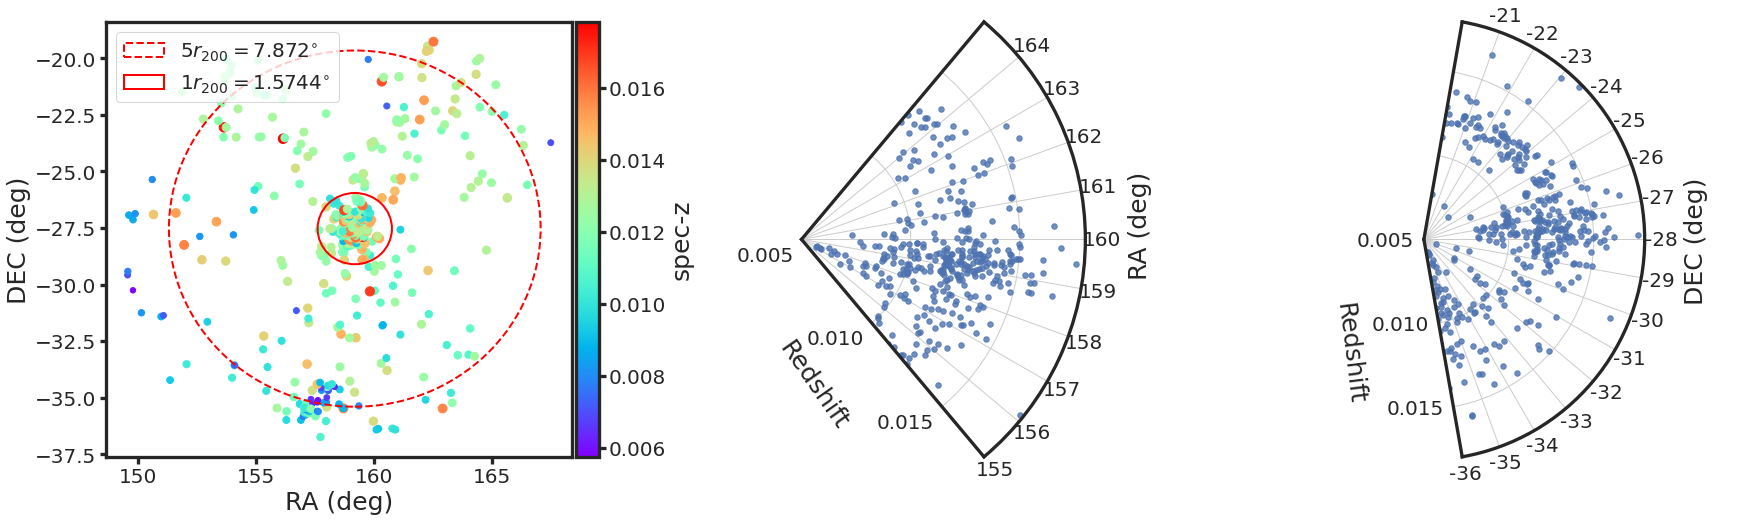

In [71]:
mlim = 19
z_range = 0.018

fontsize = 25
labelsize = 20

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection='polar')
ax3 = fig.add_subplot(133, projection='polar')

#======================================
#First figure: RA x DEC distribution 
#======================================

mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > probgal_cut)
# mask = (z > 0.005) & (z < z_range) & (obj_class == "GALAXY") & (distances_sz < 5*radius)

sc1 = ax1.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax1.set_ylabel("DEC (deg)", fontsize=fontsize)
ax1.set_xlabel("RA (deg)", fontsize=fontsize)
# ax1.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra0, dec0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax1.add_patch(FiveR200)

OneR200 = plt.Circle((ra0, dec0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax1.add_patch(OneR200)

ax1.legend(fontsize=fontsize*0.8)

#======================================
#Second figure: Cone diagram in R.A.
#======================================

# Scale factor
sf = 10

# mask_sz2 = (rpetro_sz < mlim) & (probgal_sz > 0.8)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
# ax2.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)
ax2.scatter(sf*ra_sz[mask]*np.pi/180, z[mask], s=30.0, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax2.set_ylim(0.005, z_range)
ax2.set_yticks(np.arange(0.0050, z_range, 0.005))
ax2.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180)
ax2.set_xticklabels(np.arange(155,  165, 1))
ax2.set_theta_offset(sf*200*np.pi/180) # This offset is here to change the position of the slice
ax2.set_thetamax(sf*165)
ax2.set_thetamin(sf*155)

# ax2.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax2.get_rlabel_position()
ax2.text(np.radians(label_position+52), ax2.get_rmax()*0.65,'Redshift', 
             rotation=-55, ha='center',va='center', fontsize=fontsize)
ax2.text(np.radians(label_position+140), z_range+0.0025, 'RA (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax2.grid(True)

#======================================
#Third figure: Cone diagram in DEC
#======================================

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
# ax3.scatter(sf*dec_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)
ax3.scatter(sf*dec_sz[mask]*np.pi/180, z[mask], s=30.0, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax3.set_ylim(0.005, z_range)
ax3.set_yticks(np.arange(0.0050, z_range, 0.005))
ax3.set_xticks(sf*np.arange(-36,  -20, 1)*np.pi/180)
ax3.set_xticklabels(np.arange(-36, -20, 1))
ax3.set_theta_offset(sf*28*np.pi/180) # This offset is here to change the position of the slice
ax3.set_thetamax(sf*-20)
ax3.set_thetamin(sf*-36)

# ax3.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax3.get_rlabel_position()
ax3.text(-0.24*np.pi, 0.013,'Redshift', 
             rotation=-83, ha='center',va='center', fontsize=fontsize)
ax3.text(np.radians(label_position)+1.0, 0.021, 'DEC (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax3.grid(True)

#======================================
#Global stuff
#======================================

# for ax in [ax1, ax2, ax3]:
#     ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
#     ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
    
plt.savefig("../Figures/raxdec_coneRA&DEC.png", format='png')     

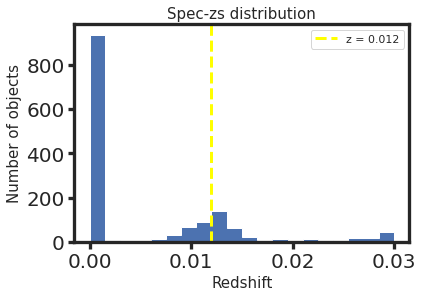

In [73]:
fontsize=15

mask = (z > 0.0) & (z < 0.03)
plt.hist(z[mask], bins=20, histtype='stepfilled')
plt.axvline(x=0.012, linestyle='--', color='yellow', linewidth=3.0, label="z = 0.012")
plt.title('Spec-zs distribution', fontsize=fontsize)
plt.xlabel("Redshift", fontsize=fontsize)
plt.ylabel("Number of objects", fontsize=fontsize)
plt.legend()
# plt.grid()

# Individual plots

/tmp/ipykernel_260034/2494548314.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout(pad=-2.5)


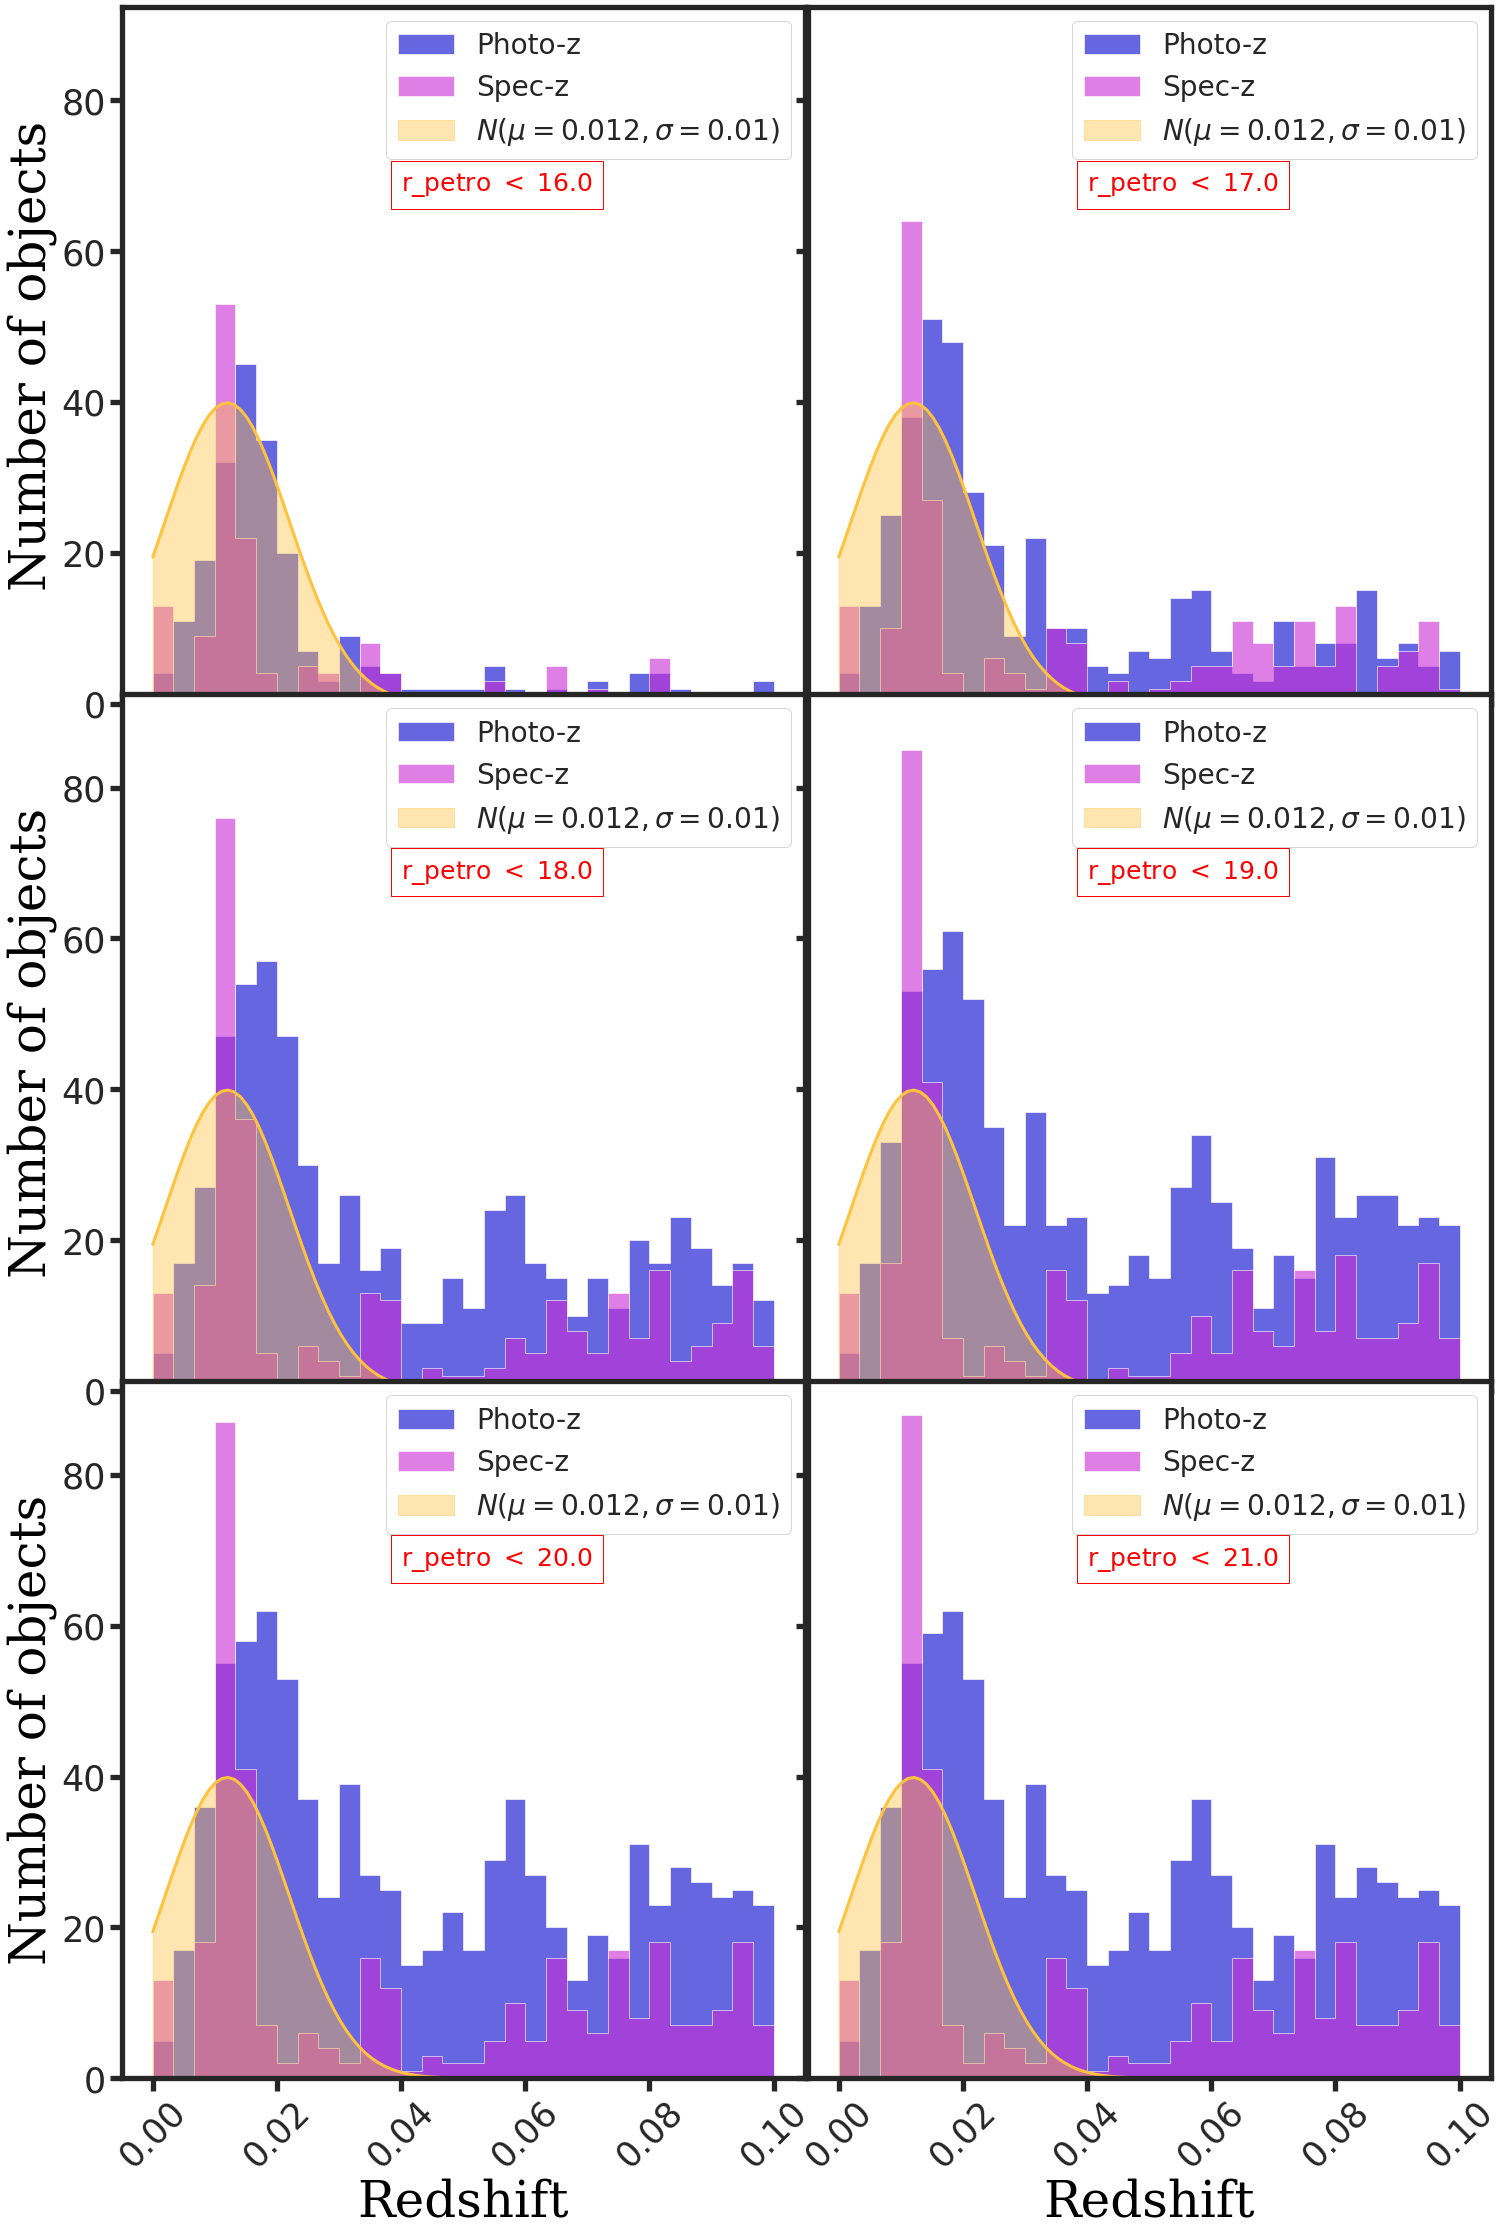

In [9]:
from scipy.stats import norm

x_axis = np.linspace(0, 0.1, 100)
mean = 0.012
sd = 0.01

#Pra cada plot eu defino essas "masks", que são os critérios pra selecionar os dados que quero plotar
odds_min = 0.7
z_range = 0.018

fig, axs = plt.subplots(3, 2, figsize=(20, 30), constrained_layout = True, sharey=True, sharex=True)

for ax, mlim in zip(axs.ravel(), np.arange(16, 22)):
    mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim) & (odds 
                                                                                    > odds_min) & (prob_gal > 0.8)
    mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim) & (probgal_sz > 0.8)

    ax.hist(zml[mask_pz], alpha=0.6, label='Photo-z', bins=30, range=(0, 0.1), histtype='stepfilled', color=colors[1])
    ax.hist(z[mask_sz], alpha=0.6, label='Spec-z', bins=30, range=(0, 0.1), histtype='stepfilled', color=colors[4])
    ax.fill_between(x_axis, norm.pdf(x_axis, mean, sd), color=colors[7], alpha=0.4, label=r"$N(\mu = 0.012, \sigma=0.01)$")
    ax.plot(x_axis, norm.pdf(x_axis, mean, sd), color=colors[7], linewidth=3.0)

    ax.text(0.04, 68, r'r_petro $ < $ {:.1f}'.format(mlim), fontsize=25, color="red", bbox=dict(facecolor='none', edgecolor='red', pad=10.0))

    if np.isin(ax, [axs.ravel()[0], axs.ravel()[2], axs.ravel()[4]]):
        ax.set_ylabel("Number of objects", fontdict=font)
        
    if np.isin(ax, [axs.ravel()[4], axs.ravel()[5], axs.ravel()[4]]):
        ax.set_xlabel("Redshift", fontdict=font)
        ax.xaxis.set_tick_params(rotation=45)
    
#     ax.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
#     ax.axvline(x=0.0165, linestyle='--', color='navy', linewidth=3.0)
#     ax.axvline(x=0.03, linestyle='--', color='red', linewidth=1.0, alpha=0.5, label="z=0.03")
    ax.legend(fontsize=fontsize*0.8)


fig.tight_layout(pad=-2.5)
plt.savefig("../Figures/Dissertation/redshifts-distribution_gaussian.pdf", format='pdf')

## Distribution of redshifts

In [47]:
mlim = 16
odds_min = 0.7
z_range = 0.018

# fontsize = 30
# labelsize = 25

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

/tmp/ipykernel_166149/3197478182.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout(pad=-0.9)


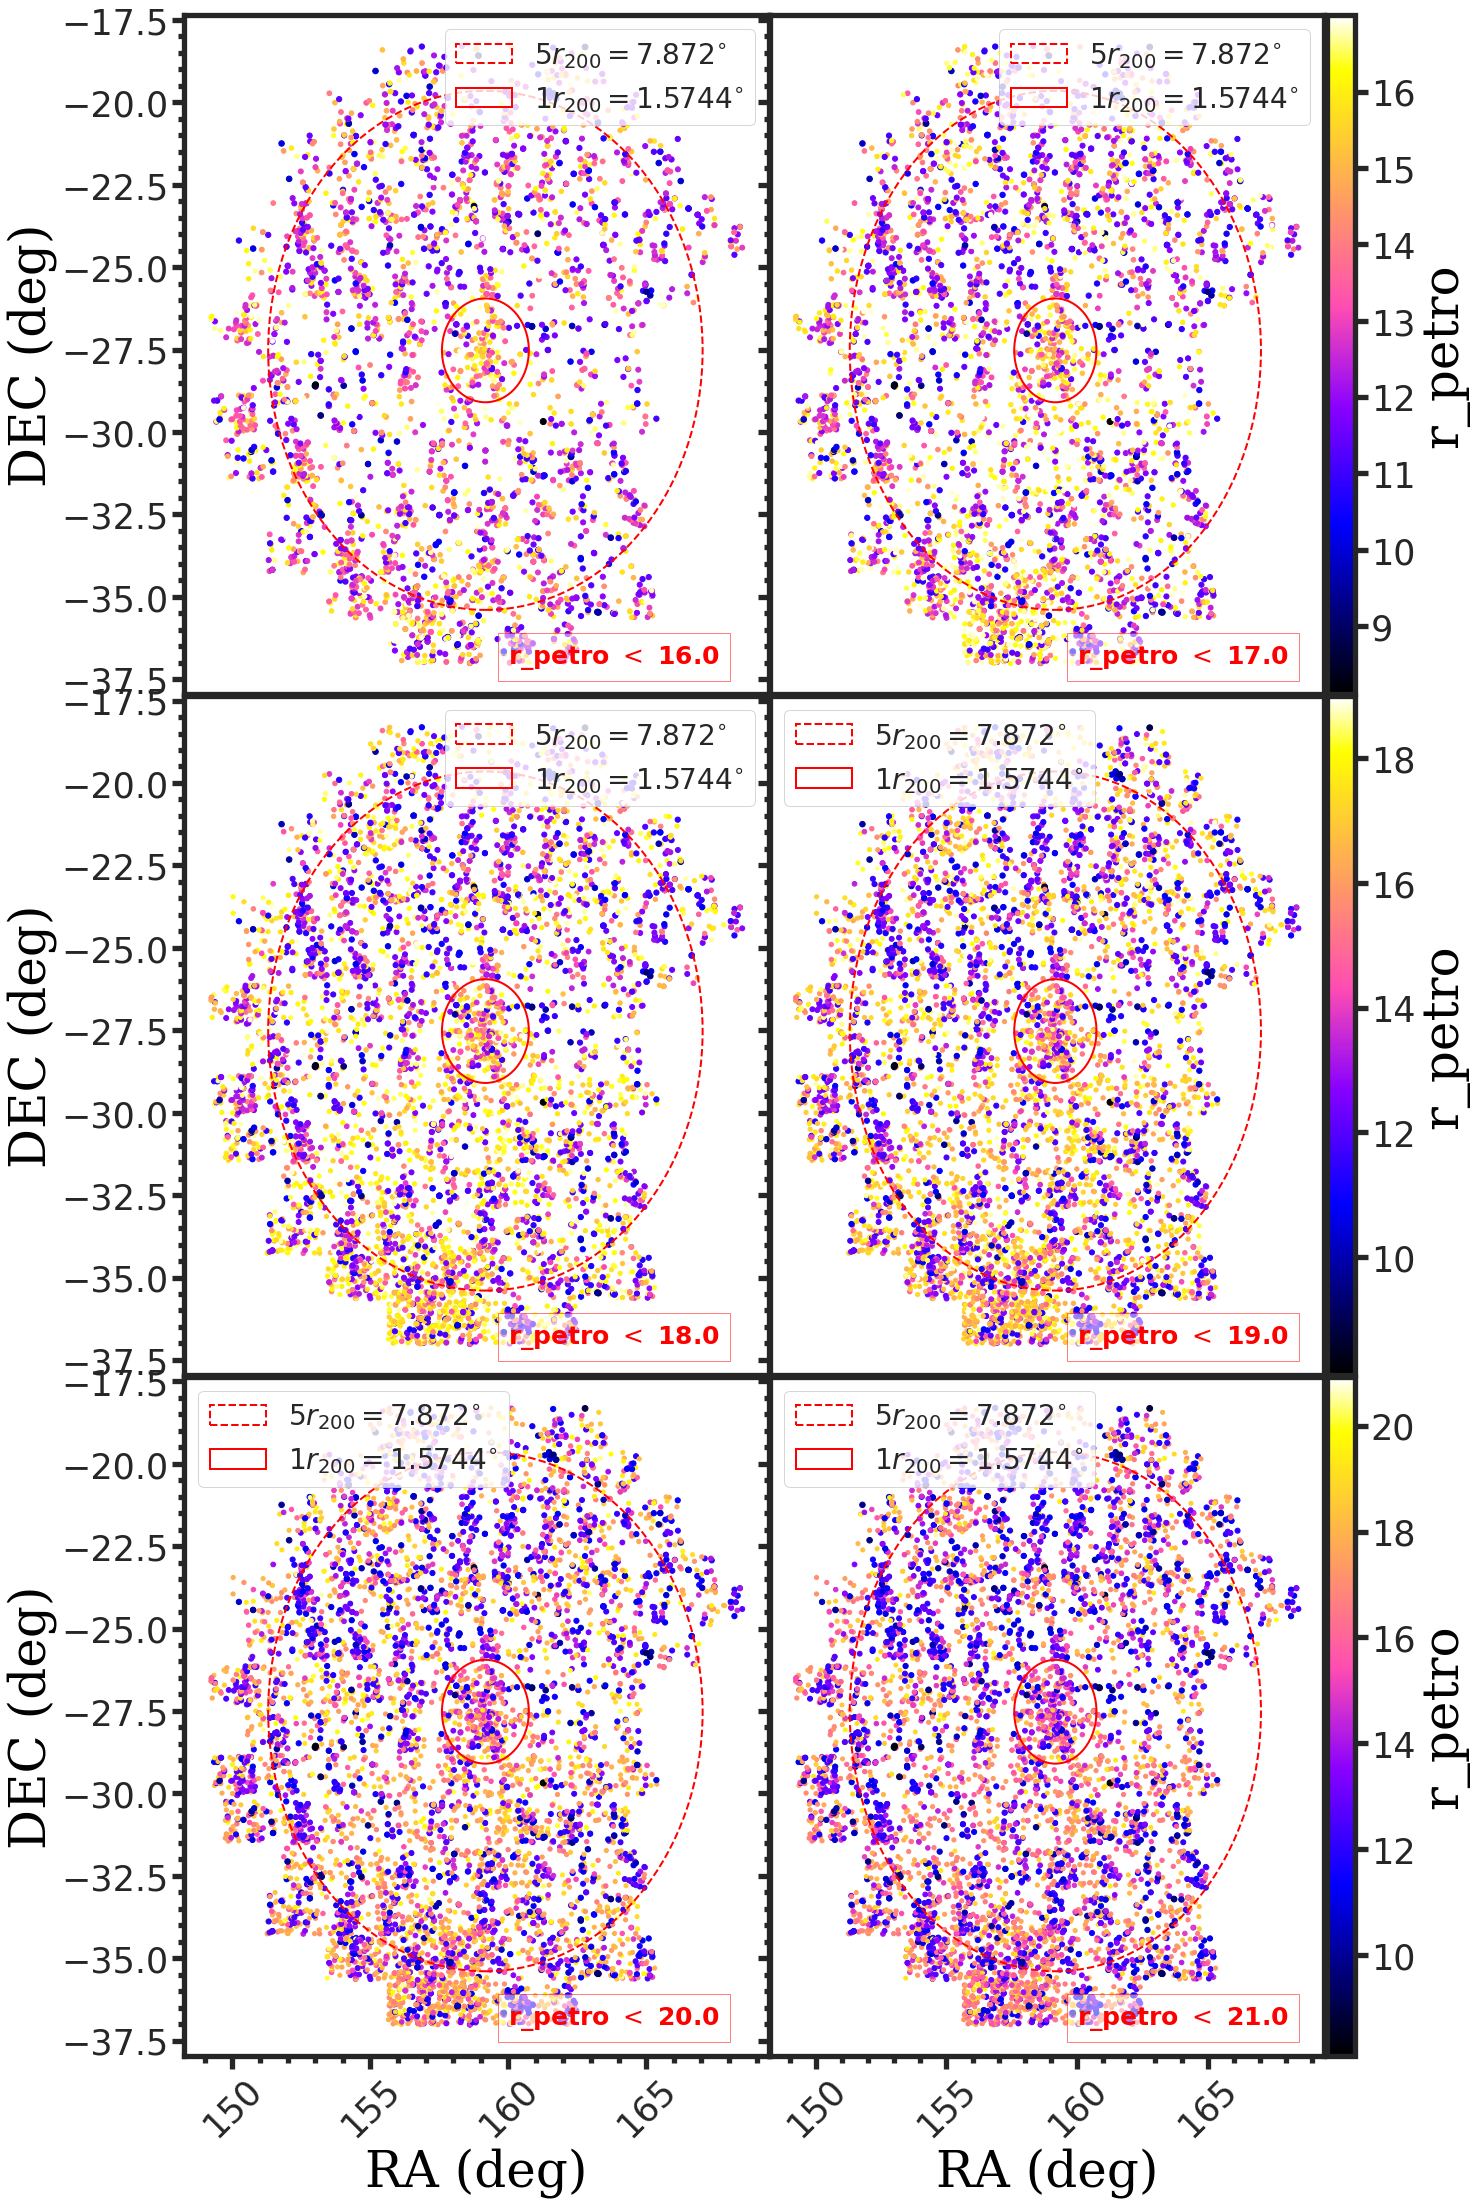

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(20, 30), constrained_layout = True, sharey=True, sharex=True)

for ax, mlim in zip(axs.ravel(), np.arange(16, 22)):
    mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min) & (prob_gal > probgal_cut)

    sc1 = ax.scatter(x=ra_pz[mask], y=dec_pz[mask], c=rpetro_pz[mask], cmap="gnuplot2", s=(1/rpetro_pz[mask])*300)
#     ax.set_ylabel("DEC (deg)", fontdict=font)
#     ax.set_xlabel("RA (deg)", fontdict=font)
#     ax.set_title(r"r_petro $<$ {:.1f}, 0.0 $< z_p <$ 0.03".format(mlim), fontdict=font)

    if np.isin(ax, [axs.ravel()[1], axs.ravel()[3], axs.ravel()[5]]):
        divider = make_axes_locatable(ax)
        cax1 = divider.append_axes('right', size='5%', pad=0.05)
        cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
        cbar.set_label(label="r_petro", fontdict=font)
        cbar.ax.tick_params(labelsize=labelsize)

    if np.isin(ax, [axs.ravel()[0], axs.ravel()[2], axs.ravel()[4]]):
        ax.set_ylabel("DEC (deg)", fontdict=font)
        
    if np.isin(ax, [axs.ravel()[4], axs.ravel()[5], axs.ravel()[4]]):
        ax.set_xlabel("RA (deg)", fontdict=font)
        ax.xaxis.set_tick_params(rotation=45)

    FiveR200 = plt.Circle((ra0, dec0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
    ax.add_patch(FiveR200)

    OneR200 = plt.Circle((ra0, dec0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
    ax.add_patch(OneR200)

    ax.legend(fontsize=fontsize*0.8)

    ax.minorticks_on()
    
    ax.text(160, -37, r'r_petro $ < $ {:.1f}'.format(mlim), fontsize=25, color="red", bbox=dict(facecolor='white', alpha=0.5, edgecolor='red', pad=10.0), weight='bold')


fig.tight_layout(pad=-0.9)
# plt.savefig("../Figures/Dissertation/RAxDECxr_petro.png".format(mlim), format='png')

## RA x DEC x r_petro

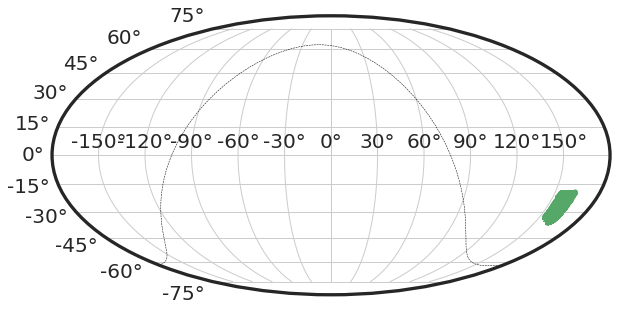

In [81]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection='mollweide')
ax.grid()

gal_coords = SkyCoord(l=np.linspace(0, 360, 1000), b=np.zeros(1000), unit=u.deg, frame='galactic')
gal_coords = gal_coords.transform_to('icrs')

sorted_gal_idx = np.argsort(gal_coords.ra.wrap_at('180d').radian)
ax.plot(-gal_coords.ra.wrap_at('180d').radian[sorted_gal_idx], gal_coords.dec.radian[sorted_gal_idx], '--', lw=0.5, color='black', label='Milky Way')

phi = np.linspace(0, 2.*np.pi, len(ra_ls))
r = 1*np.pi/180
x = ra_ls*np.pi/180 + r*np.cos(phi)
y = dec_ls*np.pi/180 + r*np.sin(phi)
ax.plot(x, y, color="g")

In [98]:
#lambda --> longitude --> right ascencion
#phi --> latitude --> declination

sigma = np.deg2rad(radius)

phi1 = np.deg2rad(dec0)
phi2 = np.linspace(phi1 - 5*sigma, phi1 + 5*sigma, 1000)
lambda1 = np.deg2rad(ra0)

def lambda2(sigma):
#     lambda_1sthalf = np.arccos((np.cos(sigma) - (np.sin(phi1)*np.sin(phi2_1sthalf))) / (np.cos(phi1) * np.cos(phi2_1sthalf))) + lambda1
    lambda2 = np.arccos((np.cos(sigma) - (np.sin(-phi1)*np.sin(-phi2))) / (np.cos(-phi1) * np.cos(-phi2))) + lambda1
    return lambda2

lambda2_1 = lambda2(sigma)
lambda2_2 = lambda2(3*sigma)
lambda2_3 = lambda2(5*sigma) 

# phi2 = np.concatenate((phi2_2ndhalf, phi2_2ndhalf))

/tmp/ipykernel_37061/118845679.py:12: RuntimeWarning: invalid value encountered in arccos
  lambda2 = np.arccos((np.cos(sigma) - (np.sin(-phi1)*np.sin(-phi2))) / (np.cos(-phi1) * np.cos(-phi2))) + lambda1


In [83]:
from astropy.visualization.wcsaxes import SphericalCircle

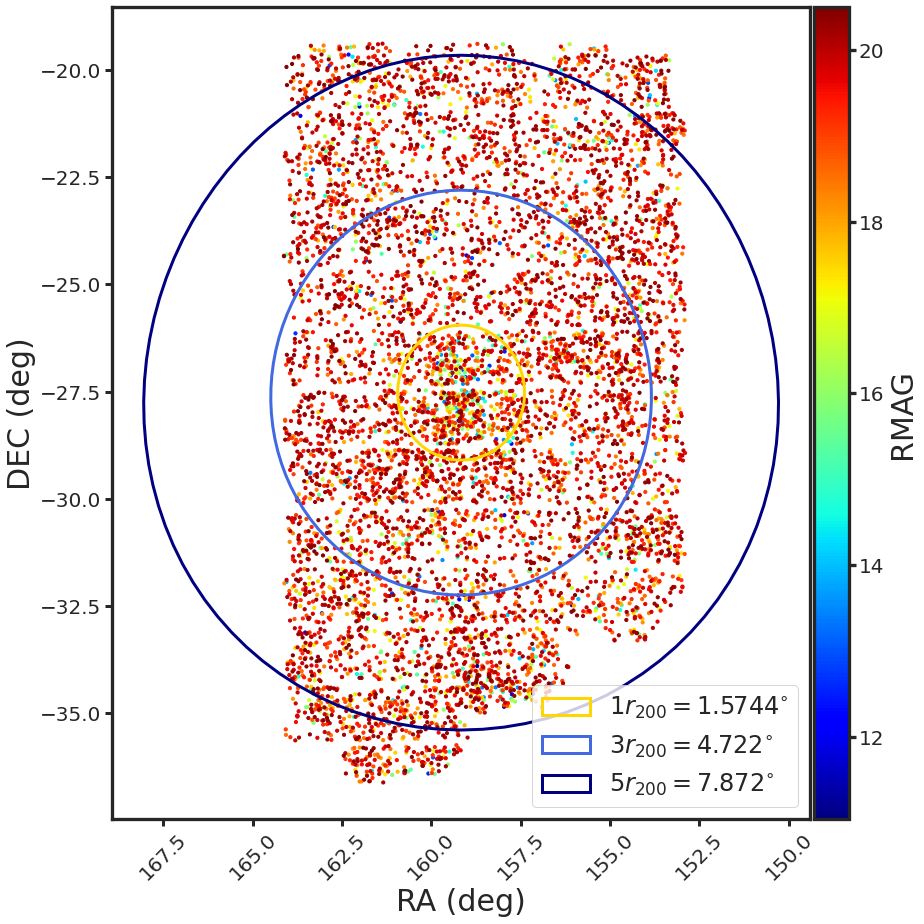

In [84]:
mlim = 21
odds_min = 0.7
z_range = 0.018

fontsize=30
labelsize=20

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

#==========================================================

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
s1 = SphericalCircle(c0, radius*u.deg, resolution=100, vertex_unit='deg', lw=3, label=r'$1 r_{200} = 1.5744^{\circ}$', edgecolor="gold", facecolor="None")
s2 = SphericalCircle(c0, 3*radius*u.deg, resolution=100, vertex_unit='deg', lw=3, label=r'$3 r_{200} = 4.722^{\circ}$', edgecolor="royalblue", facecolor="None")
s3 = SphericalCircle(c0, 5*radius*u.deg, resolution=100, vertex_unit='deg', lw=3, label=r'$5 r_{200} = 7.872^{\circ}$', edgecolor="navy", facecolor="None")

sc1 = ax.scatter(x=ra_ls, y=dec_ls, c=rmag, cmap=cm1, s=10)
ax.set_ylabel("DEC (deg)", fontsize=fontsize)
ax.set_xlabel("RA (deg)", fontsize=fontsize)

divider = make_axes_locatable(ax)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="RMAG", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

ax.add_patch(s1)
ax.add_patch(s2)
ax.add_patch(s3)

ax.legend(fontsize=fontsize*0.8)
ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

ax.xaxis.set_tick_params(labelsize=labelsize, width=3, length=7)
ax.yaxis.set_tick_params(labelsize=labelsize, width=3, length=7)

ax.invert_xaxis()

fig.tight_layout()
plt.show()
# plt.savefig("../Presentations/cosmo22-splus-poster/RAxDECxr_petro_m{:2d}.png".format(mlim), format='png') 

In [15]:
table_specz = pd.read_csv("../CHANCES-target-selection/CHANCES-catalogues/Hydra_Catalogue-2.5sigma_above_r16.5-SpecZ-Crossmatch.csv", usecols=["RA_J2000", "Dec_J2000", "RMAG", "zml"])

In [16]:
ra_ls_specz = table_specz["RA_J2000"]
dec_ls_specz = table_specz["Dec_J2000"]
rmag_specz = table_specz["RMAG"]
zml_specz = table_specz["zml"]

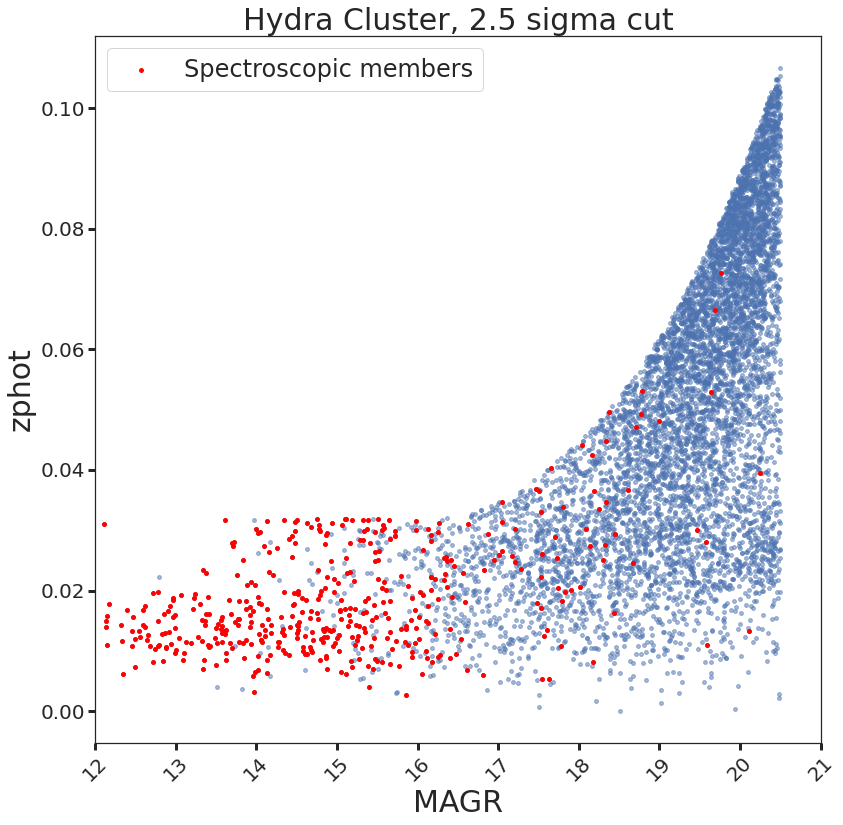

In [28]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)
ax.scatter(rmag, zml,  alpha=0.5, s=15)
ax.scatter(rmag_specz, zml_specz, s=15 , c= 'red', label = 'Spectroscopic members')
ax.set_xlabel('MAGR',fontsize=fontsize)
ax.set_ylabel('zphot', fontsize=fontsize)
ax.set_xlim(12, 21)
ax.set_title("Hydra Cluster, 2.5 sigma cut", fontsize=fontsize)
# ax.set_yticks(fontsize=labelsize)
# ax.xticks(fontsize=labelsize)

ax.legend(fontsize=fontsize*0.8)
ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

ax.xaxis.set_tick_params(labelsize=labelsize, width=3, length=7)
ax.yaxis.set_tick_params(labelsize=labelsize, width=3, length=7)

## RA x DEC x spec-z

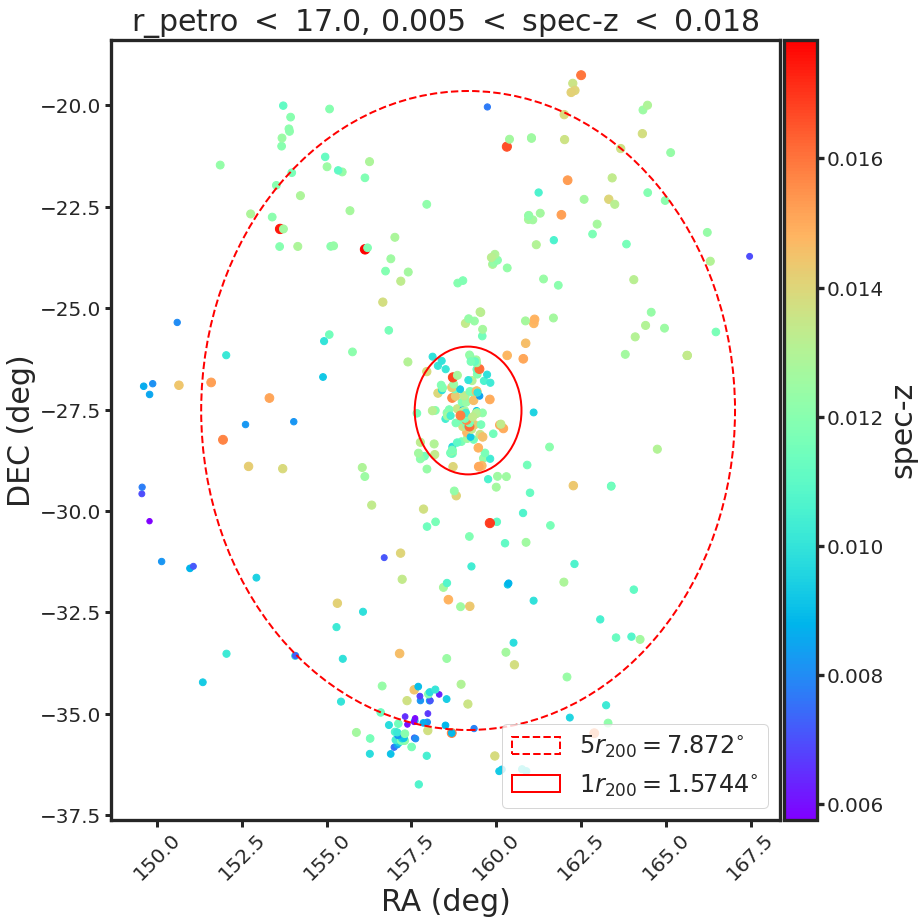

In [117]:
fig = plt.figure(figsize=(13, 13))
ax3 = fig.add_subplot(111)

mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > 0.8)

sc1 = ax3.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax3.set_ylabel("DEC (deg)", fontsize=fontsize)
ax3.set_xlabel("RA (deg)", fontsize=fontsize)
ax3.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax3)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra0, dec0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax3.add_patch(FiveR200)

OneR200 = plt.Circle((ra0, dec0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax3.add_patch(OneR200)

ax3.legend(fontsize=fontsize*0.8)
ax3.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax3.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

fig.tight_layout()
# plt.savefig("../Presentations/cosmo22-splus-poster/RAxDECxspecz.png".format(mlim), format='png') 

## Cone diagram in RA

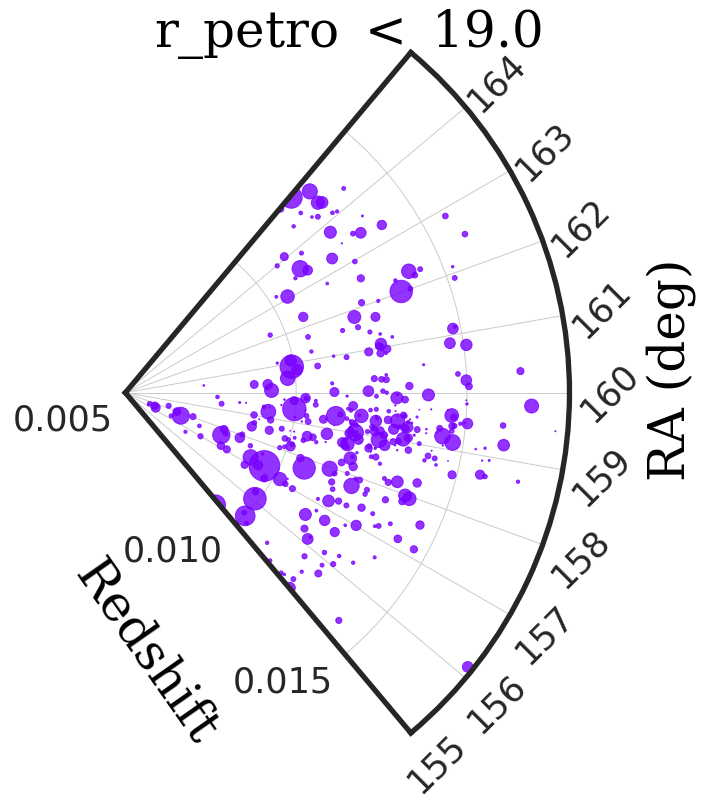

In [248]:
mlim = 19

fig = plt.figure(figsize=(13, 13))
ax2 = fig.add_subplot(111, projection='polar')

# Scale factor
sf = 10

mask_sz2 = (rpetro_sz < mlim) & (probgal_sz > 0.8)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax2.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8, color=colors[3])

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax2.set_ylim(0.005, z_range)
ax2.set_yticks(np.arange(0.0050, z_range, 0.005))
ax2.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180)
ax2.set_xticklabels(np.arange(155,  165, 1))
ax2.set_theta_offset(sf*200*np.pi/180) # This offset is here to change the position of the slice
ax2.set_thetamax(sf*165)
ax2.set_thetamin(sf*155)

# ax2.set_ticksize(12.5)

ax2.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontdict=font, y=1.0)


label_position=ax2.get_rlabel_position()
ax2.text(np.radians(label_position+52), ax2.get_rmax()*0.70,'Redshift', 
             rotation=-55, ha='center',va='center', fontdict=font)
ax2.text(np.radians(label_position+140), z_range+0.0030, 'RA (deg)', ha='center', va='center', rotation=90, fontdict=font)
ax2.grid(True)

# ax2.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax2.xaxis.set_tick_params(rotation=45, pad=20.0)

fig.tight_layout()
plt.savefig("../Figures/Dissertation/cone-diagram-RA.png", format='png')

## Cone diagram in DEC

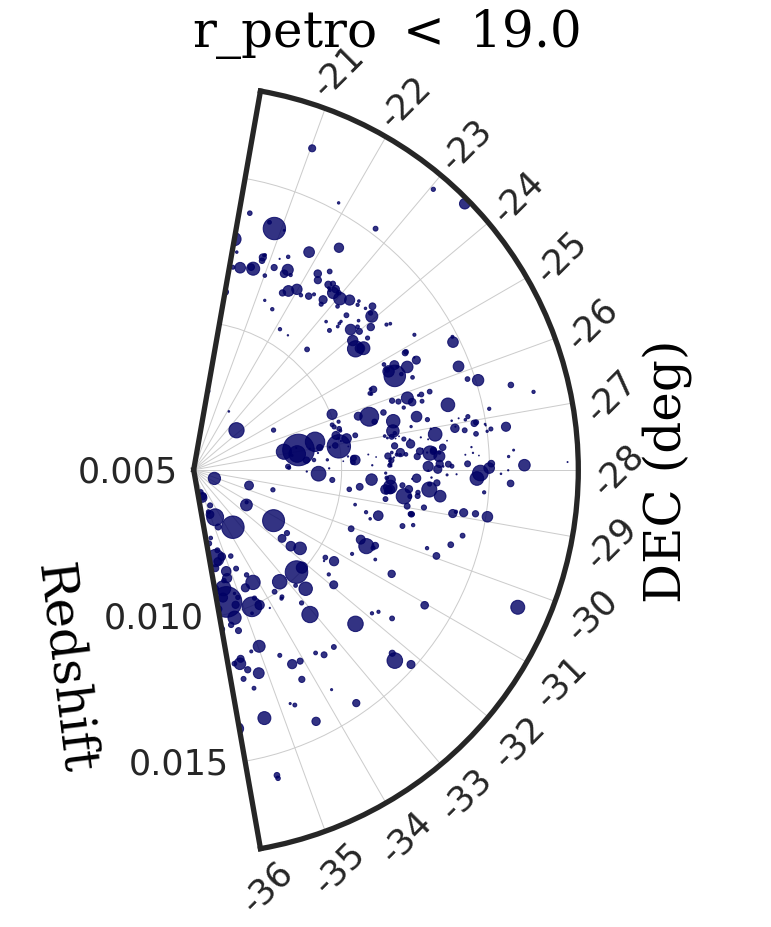

In [263]:
fig = plt.figure(figsize=(13, 13))
ax3 = fig.add_subplot(111, projection='polar')

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax3.scatter(sf*dec_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8, color=colors[0])

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax3.set_ylim(0.005, z_range)
ax3.set_yticks(np.arange(0.0050, z_range, 0.005))
ax3.set_xticks(sf*np.arange(-36,  -20, 1)*np.pi/180)
ax3.set_xticklabels(np.arange(-36, -20, 1))
ax3.set_theta_offset(sf*28*np.pi/180) # This offset is here to change the position of the slice
ax3.set_thetamax(sf*-20)
ax3.set_thetamin(sf*-36)

ax3.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontdict=font, y=1.05)


label_position=ax3.get_rlabel_position()
ax3.text(-0.24*np.pi, 0.013,'Redshift', 
             rotation=-83, ha='center',va='center', fontdict=font)
ax3.text(np.radians(label_position)+1.0, 0.021, 'DEC (deg)', ha='center', va='center', rotation=90, fontdict=font)
ax3.grid(True)

# ax3.yaxis.set_tick_params(labelsize=labelsize, width=3)
# ax3.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

ax3.xaxis.set_tick_params(rotation=45, pad=20.0)

fig.tight_layout()
plt.savefig("../Figures/Dissertation/cone-diagram-DEC.png", format='png')

## Plot RA x DEC x photo-z & spec-z 

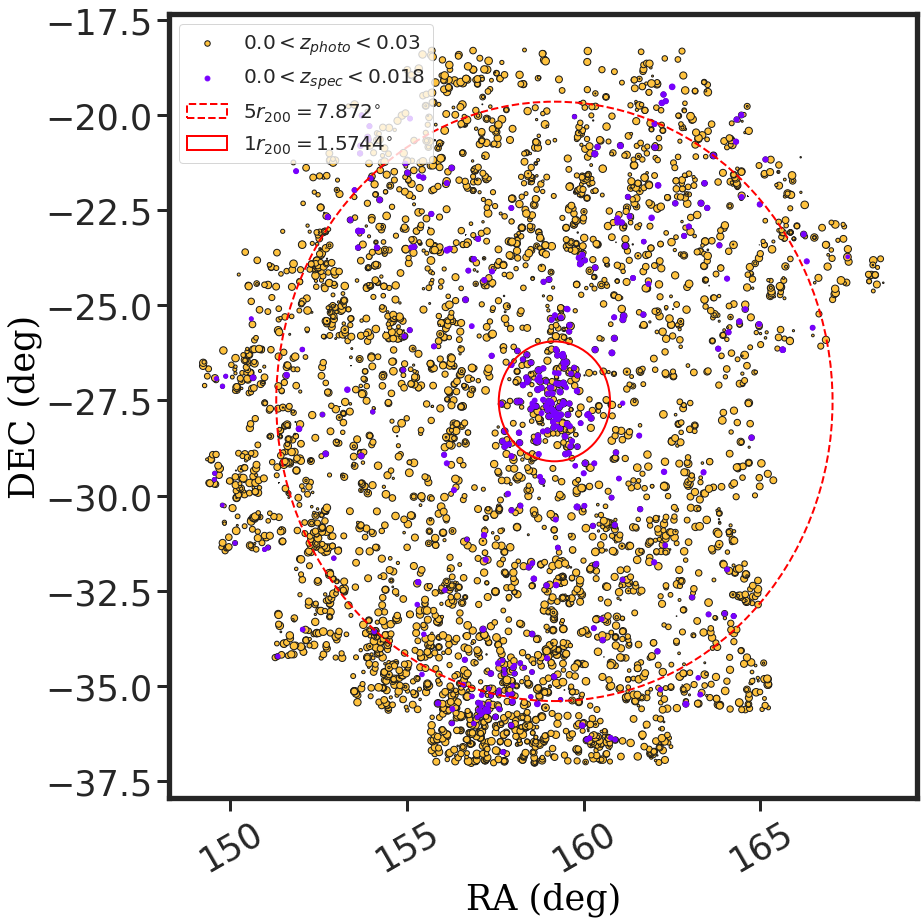

In [275]:
fig = plt.figure(figsize=(13, 13))
ax2 = fig.add_subplot(111)

mlim = 17
mask_pz = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min) & (prob_gal > probgal_cut)
# mask_pz = (rpetro_pz < mlim) & (prob_gal > probgal_cut)

sc1 = ax2.scatter(x=ra_pz[mask_pz], y=dec_pz[mask_pz], s=zml[mask_pz]*2e3, 
                      label=r"$0.0 < z_{photo} < 0.03$", color=colors[7], edgecolor='k')
ax2.set_ylabel("DEC (deg)", fontdict=font)
ax2.set_xlabel("RA (deg)", fontdict=font)

mask_sz = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > probgal_cut)

sc1 = ax2.scatter(x=ra_sz[mask_sz], y=dec_sz[mask_sz], cmap=cm2, s=z[mask_sz]*2e3, 
                      label=r"$0.0 < z_{spec} < 0.018$", color=colors[3])
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)
# ax2.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

FiveR200 = plt.Circle((ra0, dec0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax2.add_patch(FiveR200)

OneR200 = plt.Circle((ra0, dec0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax2.add_patch(OneR200)

ax2.legend(fontsize=20, loc=0)
ax2.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax2.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=30)

fig.tight_layout()
plt.savefig("../Figures/Dissertation/DECxRAXphotoz&specz.png", format='png')